# Análisis Exploratorio de Datos (EDA) - Fashion MNIST

Este notebook realiza un análisis detallado del conjunto de datos **Fashion-MNIST**, analizando su estructura, distribución de clases y características visuales.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Configuración de estilo para seaborn
sns.set(style='whitegrid')

## 1. Carga del Conjunto de Datos

Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consiste en un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de prueba de 10,000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada con una etiqueta de 10 clases.

In [10]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Dimensiones de entrenamiento: {x_train.shape}")
print(f"Dimensiones de prueba: {x_test.shape}")

# Definir nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Dimensiones de entrenamiento: (60000, 28, 28)
Dimensiones de prueba: (10000, 28, 28)


## 2. Visualización de Muestras

Visualizamos las primeras 25 imágenes del conjunto de entrenamiento para entender qué tipo de datos estamos manejando.

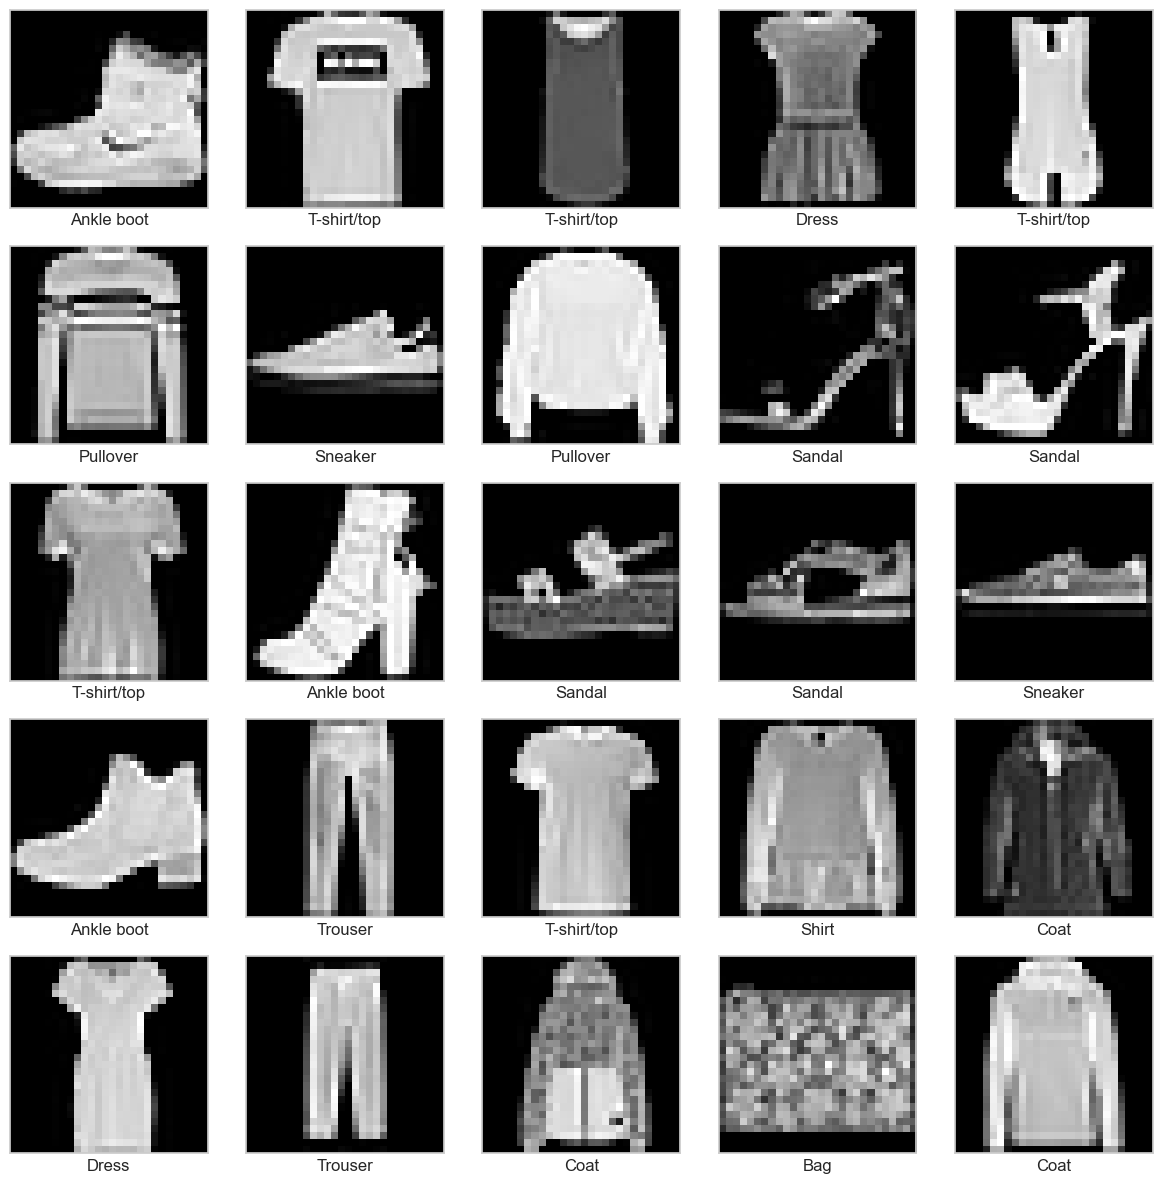

In [11]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]], fontsize=12)
plt.tight_layout()
plt.show()

## 3. Distribución de Clases

Es crucial verificar si el dataset está balanceado para evitar sesgos en el modelo posterior.

C:\Users\joseg\AppData\Local\Temp\ipykernel_18488\917188490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_train, palette='viridis')


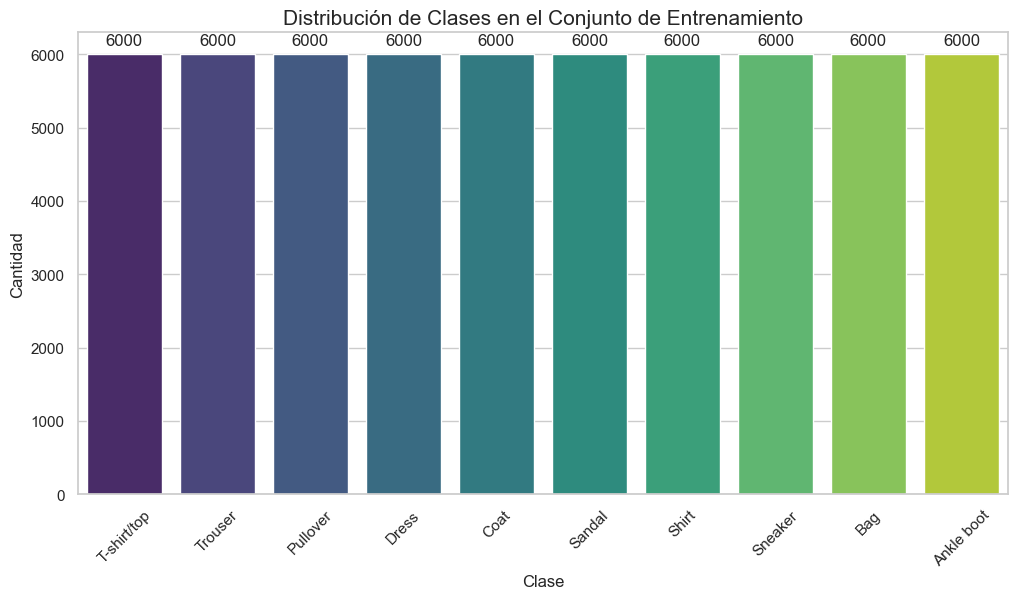

In [12]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=y_train, palette='viridis')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento', fontsize=15)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadir etiquetas de conteo sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

## 4. Análisis de Intensidad de Píxeles

Analizamos los valores de los píxeles (que van de 0 a 255) para comprender la distribución de luminosidad.

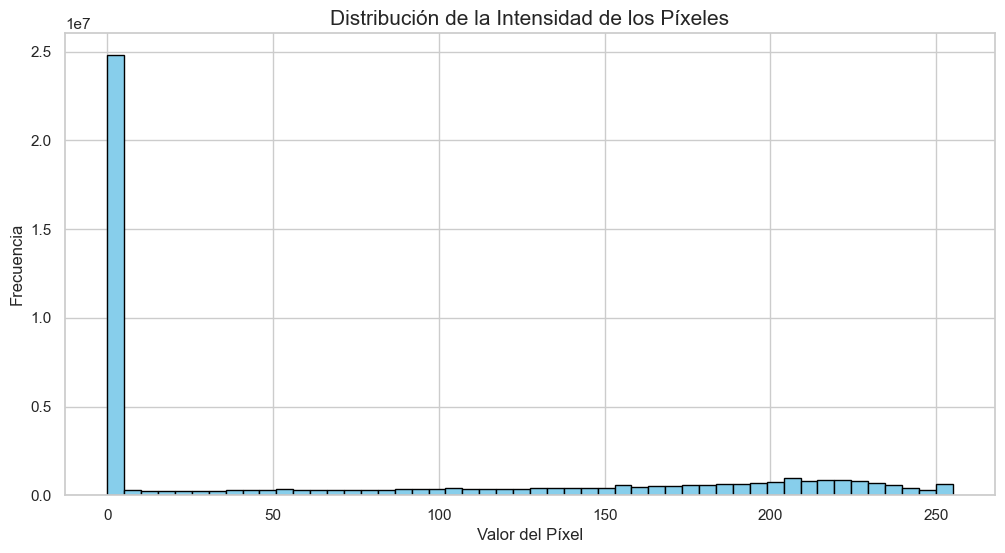

In [13]:
plt.figure(figsize=(12,6))
plt.hist(x_train.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de la Intensidad de los Píxeles', fontsize=15)
plt.xlabel('Valor del Píxel', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

## 5. Visualización Promedio por Clase

Podemos visualizar el "promedio" de cada prenda para entender las características comunes.

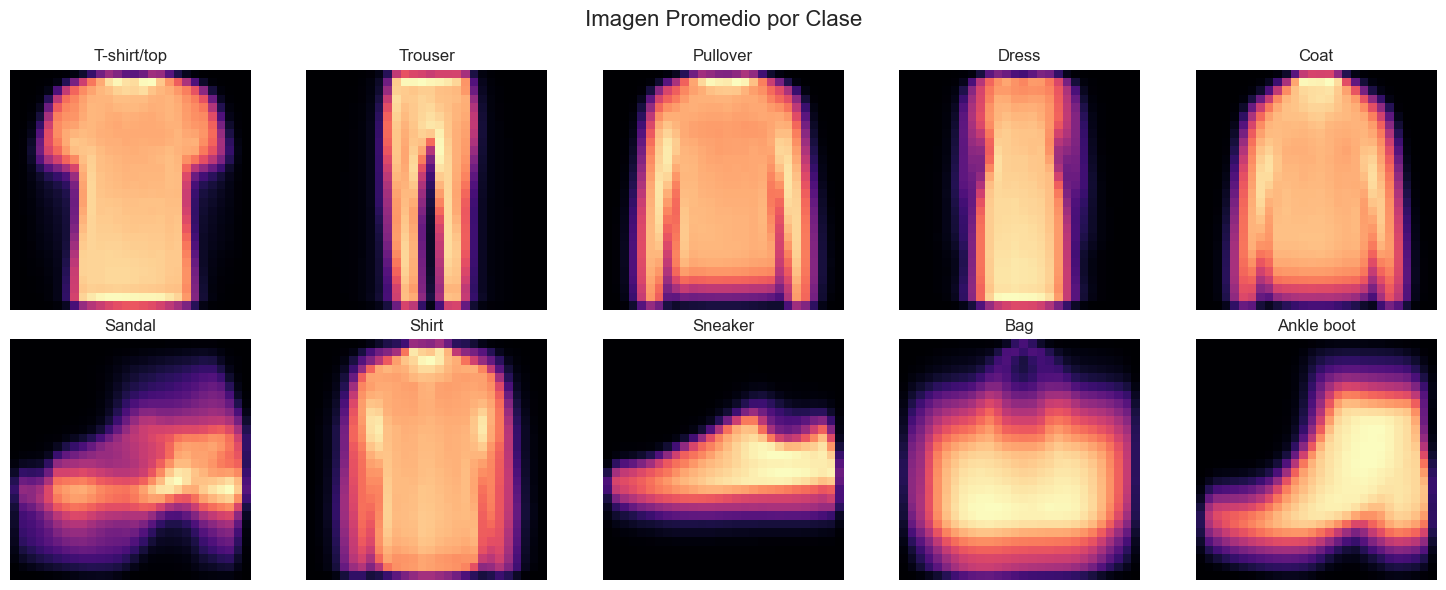

In [14]:
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    class_images = x_train[y_train == i]
    avg_image = np.mean(class_images, axis=0)
    plt.imshow(avg_image, cmap='magma')
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Imagen Promedio por Clase', fontsize=16)
plt.tight_layout()
plt.show()

## 6. Análisis de Variabilidad (Desviación Típica)

La desviación típica nos muestra qué tan diferentes son las prendas dentro de una misma categoría. Las zonas más brillantes indican mayor variabilidad.

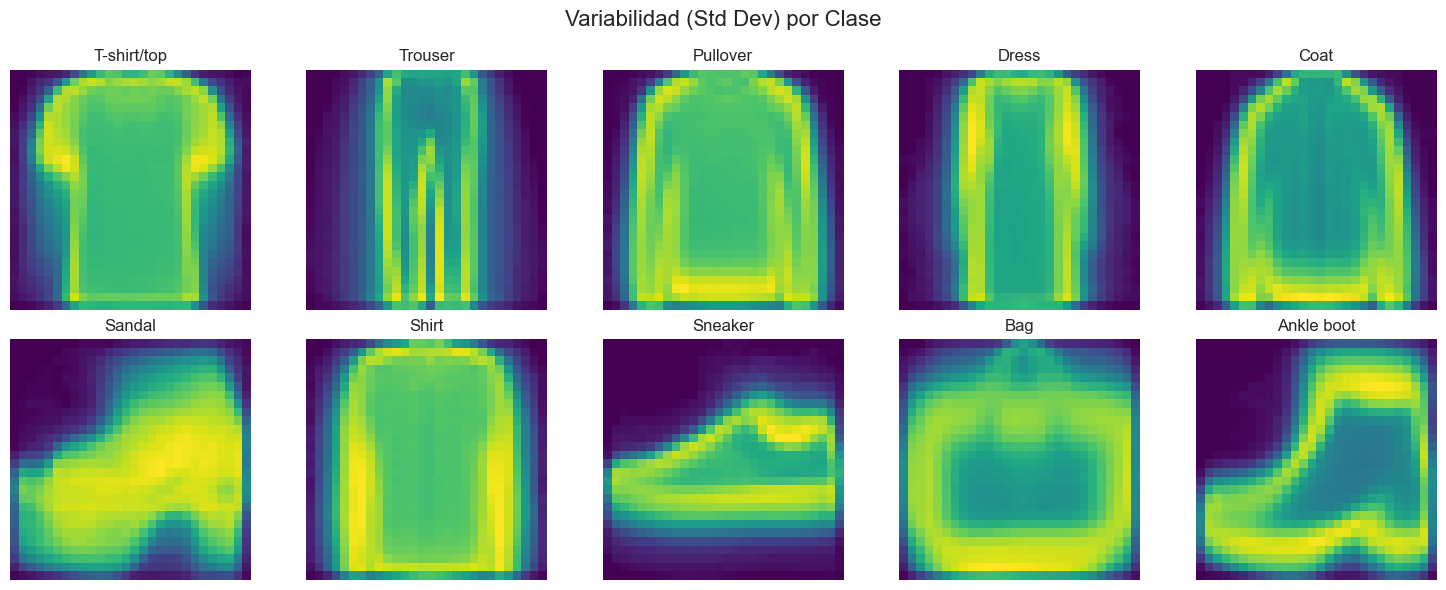

In [15]:
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    class_images = x_train[y_train == i]
    std_image = np.std(class_images, axis=0)
    plt.imshow(std_image, cmap='viridis')
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Variabilidad (Std Dev) por Clase', fontsize=16)
plt.tight_layout()
plt.show()

## 7. Similitud entre Clases

Calculamos la correlación entre las imágenes promedio de cada clase para identificar cuáles son más propensas a confundirse.

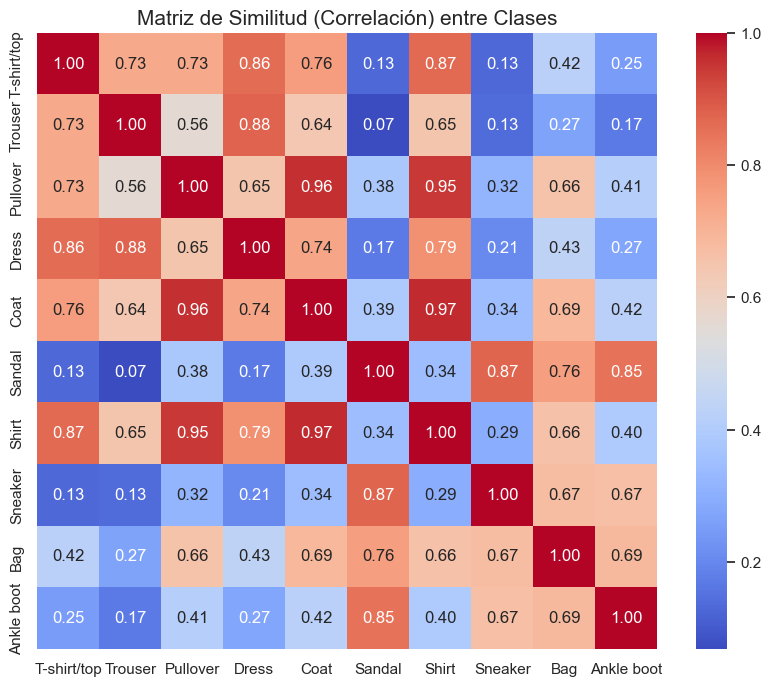

In [16]:
avg_images = []
for i in range(10):
    avg_images.append(np.mean(x_train[y_train == i], axis=0).flatten())

similarity_matrix = np.corrcoef(avg_images)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Similitud (Correlación) entre Clases', fontsize=15)
plt.show()

## 8. Análisis de Ocupación de Píxeles (Sparsity)

¿Cuánta área ocupa cada prenda en promedio? Esto puede ser un rasgo distintivo rápido.

C:\Users\joseg\AppData\Local\Temp\ipykernel_18488\2073523786.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=sparsity, palette='magma')


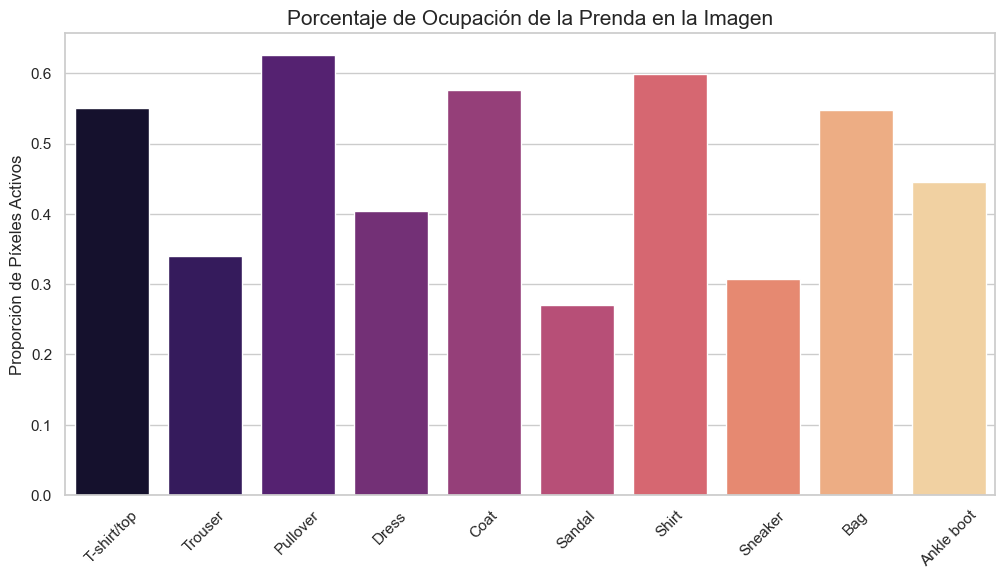

In [17]:
sparsity = []
for i in range(10):
    class_images = x_train[y_train == i]
    # Proporción de píxeles con valor > 10 (considerados no-fondo)
    occupancy = np.mean(class_images > 10)
    sparsity.append(occupancy)

plt.figure(figsize=(12, 6))
sns.barplot(x=class_names, y=sparsity, palette='magma')
plt.title('Porcentaje de Ocupación de la Prenda en la Imagen', fontsize=15)
plt.ylabel('Proporción de Píxeles Activos')
plt.xticks(rotation=45)
plt.show()

## 9. Análisis de Componentes Principales (PCA)

El PCA nos permite reducir la dimensionalidad de las imágenes (originalmente 784 píxeles) para observar si las clases son separables en un espacio de menor dimensión.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Preparación de los datos: aplanar y normalizar
x_train_flat = x_train.reshape(-1, 28*28) / 255.0

# 2. Aplicar PCA
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x_train_flat)

# 3. Visualización de la Varianza Explicada
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por el PCA')
plt.grid(True)
plt.show()

### Visualización en 2D

Proyectamos los datos en las dos primeras componentes principales para ver la distribución de las clases.

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6, s=1)
plt.colorbar(scatter, ticks=range(10), label='Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección PCA de Fashion MNIST (2D)')
plt.grid(True)
plt.show()

## 10. Conclusiones Finales

1. **Balanceo:** El dataset está perfectamente balanceado con 6,000 imágenes por clase.
2. **Similitud Crítica:** La matriz de correlación muestra que 'Shirt', 'T-shirt/top' y 'Pullover' tienen una correlación extremadamente alta (>0.90), lo que confirma que serán el principal reto para el modelo.
3. **Variabilidad:** Las botas (Ankle boot) presentan alta variabilidad en la zona del tobillo, lo que sugiere que hay diferentes alturas de bota en el dataset.
4. **Ocupación:** Los vestidos (Dress) y abrigos (Coat) son las prendas que más área ocupan, mientras que las sandalias (Sandal) son las que menos.
5. **Estrategia:** Dado el solapamiento visual entre prendas superiores, una arquitectura de Red Convolucional (CNN) será necesaria para capturar texturas y detalles finos más allá de la silueta general.